# 💵 Descobrindo Padrões em Vendas

### 📌  Objetivo

Analisar um dataset de vendas reais para desvendar os fatores que impulsionam o desempenho ao longo do tempo, combinando análise temporal avançada, segmentação detalhada e automação, com o intuito de extrair insights acionáveis e preparar uma base robusta para modelos preditivos de Machine Learning.

### 🤔 Razão

Escolhi este projeto como o ápice da minha jornada em EDA porque vendas são o coração de muitos negócios, e entender seus padrões é um desafio real e universal. Quis ir além do básico, explorando como o tempo, os clientes e as condições afetam os resultados, e transformar dados brutos em uma história que não só informe, mas também inspire soluções práticas e tecnológicas.

## 🛠️ 0. Configuração Inicial

In [7]:
# Initial Setup
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import seaborn as sns  # Statistical visualizations
import matplotlib.pyplot as plt  # Basic plotting
import plotly.express as px  # Interactive, simple charts
import plotly.graph_objects as go  # Customized interactive visualizations

# Environment Configuration
sns.set_style("whitegrid")  # Set clean visual style for charts
plt.rcParams["figure.figsize"] = (10, 6)  # Default figure size for consistency

Para descobrir o que impulsiona, influencia e aumenta as vendas, escolhi ferramentas robustas para análise, exploração, tratamento e visualização de dados, combinadas com insights estatísticos de explorações anteriores.

## 🔋 1. Carregando e Compreendendo os Dados

In [10]:
# Reading the Superstore Sales Dataset
df = pd.read_csv("superstoresales.csv")  # Load sales data from CSV file

In [11]:
# Gathering Basic Information
df.info()  # Display dataset structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

A análise inicial revelou ações necessárias:

1. Eliminar a coluna `Row ID`, redundante com o índice do Pandas, para simplificar o dataset.
2. Predominam variáveis categóricas; apenas `Postal Code` e `Sales` são numéricas, limitando estatísticas aos valores de venda e exigindo transformações em outras colunas.
3. Existem 11 valores nulos em `Postal Code`, o que demanda estratégias específicas de tratamento.

In [13]:
# Previewing the Dataset
df.head()  # Show first 5 rows to understand data layout

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
# Checking the type of each column
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [15]:
# Analyzing Numerical Distribution
df.describe()  # Summarize statistical properties of all numerical columns

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Algumas análises iniciais revelam informações valiosas:

1. Dados consistentes (Não possuímos `Sales` ou `Postal Code` negativos)
2. Presença de outliers superiores (o valor máximo excede significativamente o terceiro quartil)
3. Variáveis de data não estão no formato correto

Vamos explorar os nomes das colunas para identificar relações iniciais e planejar análises futuras.

In [17]:
# Checking Column Names for Initial Pattern Identification
df.columns  # List all column names to explore potential relationships

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

É possível idenficiar uma coluna com nomes (`Customer Name`). Apesar de fictícios, por ética e aplicabilidade real, optarei por removê-la, usando `Customer ID` para relações futuras.

A partir dos nomes das colunas, destaco relações iniciais:

1. Datas (`Order Date`, `Ship Date`) combinadas com parâmetros como cidade, país, segmento e região podem revelar distribuições e períodos ideais para campanhas, com datas como forte variável independente.
2. Produtos (`Product ID`), segmentos (`Segment`) e categorias (`Category`) versus regiões (`Region`) mostram potencial para análises promissoras.
3. Entrega (`Ship Mode`, datas) pode influenciar vendas por região, sugerindo relações a explorar.

A riqueza e variedade do dataset, com múltiplas combinações possíveis, tornam este projeto relevante, aplicável e cheio de potencial.

## 🧼 2. Limpeza e Preparação dos Dados

Vamos começar com os os passos que já determinamos anteriormente:

1. Remover colunas `Row ID` e `Customer Name`
2. Tratar as colunas com Data
3. Lidar com os nulos

E depois vamos seguir com duplicatas e outliers

In [21]:
# Dropping Unnecessary Columns
df.drop(columns=['Row ID', 'Customer Name'], axis=1, inplace=True)  # Remove redundant and ethically sensitive columns

# Verifying Remaining Columns
df.columns  # Display updated column list after removal

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

Vamos transformar as datas em tipos de dados que podemos utilizar em nossa análise (`datetime`).

Primeiro, confirmando quais colunas são de data:

In [23]:
# Checking the first row just to see wich columns have the data structure
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


Assim como o nome (`Date`) sugere, temos duas colunas com data (`Order Date` e `Ship Date`), vamos modificá-las.

In [25]:
# Converting date columns to datetime format (dd/mm/yyyy)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9800 non-null   object        
 1   Order Date    9800 non-null   datetime64[ns]
 2   Ship Date     9800 non-null   datetime64[ns]
 3   Ship Mode     9800 non-null   object        
 4   Customer ID   9800 non-null   object        
 5   Segment       9800 non-null   object        
 6   Country       9800 non-null   object        
 7   City          9800 non-null   object        
 8   State         9800 non-null   object        
 9   Postal Code   9789 non-null   float64       
 10  Region        9800 non-null   object        
 11  Product ID    9800 non-null   object        
 12  Category      9800 non-null   object        
 13  Sub-Category  9800 non-null   object        
 14  Product Name  9800 non-null   object        
 15  Sales         9800 non-null   float64 

Tudo certo, indo para os nulos agora.

Remover a quantidade de nulos (11 `Postal Code`) não impactará significativamente um dataset com cerca de 10.000 entradas.  

Mas vamos analisar os dados antes:

In [27]:
# Checking Entries with Null 'Postal Code'
df[df['Postal Code'].isna()]  # Filter rows where 'Postal Code' is null

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Alguns desses registros são outliers (valores de venda acima de Q3 + desvio padrão), e sem saber a quantidade total de outliers, eles podem ser valiosos para análise.  

Possíveis abordagens:  
1. Verificar se os `Customer ID` ligados a esses `Postal Code` nulos têm outros registros com localidade exata (caso seja única).  
2. Excluir os dados nulos.  

Primeiro, vamos buscar outros registros desses `Customer ID` pra encontrar um `Postal Code` válido.

In [29]:
# Identifying Customer IDs with Null 'Postal Code'
null_customer_ids = df[df['Postal Code'] \
.isna()]['Customer ID'].unique()  # Get unique Customer IDs with null Postal Code

# Checking Other Records for These Customer IDs
df[df['Customer ID']. \
isin(null_customer_ids)] \
[['Customer ID','Postal Code']] \
.head(10)  # Filter all rows matching these Customer IDs and showing only the relevant information

,Customer ID,Postal Code
197,VM-21685,7090.0
266,CB-12535,27514.0
1151,CB-12535,44221.0
1298,QJ-19255,55106.0
1646,VM-21685,19140.0
1647,VM-21685,19140.0
1661,QJ-19255,19143.0
1662,QJ-19255,19143.0
1683,CB-12535,94110.0
1758,RM-19375,77095.0


Ao analisar os códigos postais de `Customer ID` em entradas sem `Postal Code`, notei que os valores variam, impedindo o preenchimento dos dados faltantes.  

Restam algumas opções:  
1. Manter os nulos em `Postal Code` e usá-los com cautela nas análises futuras.  
2. Avaliar a quantidade de outliers pra decidir o valor dessas entradas.  
3. Comparar análises antes e depois da remoção, usando dois dataframes.  
4. Criar um dataframe sem os nulos e replicar análises em paralelo.  
5. Remover completamente os dados com `Postal Code` nulo.  

Como as opções 2, 3 e 4 demandam esforço extra pra um projeto demonstrativo, e os 11 nulos representam menos de 1% do dataset, optei por removê-los, considerando o impacto mínimo.

In [31]:
# Removing all entries with null 'Postal Code'
df.dropna(subset=['Postal Code'], inplace=True)  # Drop rows where Postal Code is null

# Checking for remaining nulls in 'Postal Code'
df['Postal Code'].isna().sum()  # Sum the number of null values to verify removal

0

Vamos reavaliar o `describe` pra checar mudanças significativas após a remoção:

In [33]:
# Reassessing Sales distribution after null removal
df['Sales'].describe()  # Display updated statistical summary of Sales column

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

Ótimo, comparando média e desvio padrão antes e depois, a remoção dos nulos teve impacto estatístico mínimo, permitindo prosseguir sem preocupações.

Agora vamos verificar duplicatas:

In [35]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()  # Count total number of duplicated entries

1

Com apenas uma duplicata, seu impacto é estatisticamente desprezível. 

Porém, considerando o contexto do dataset, um usuário pedir o mesmo produto, no mesmo lugar e dia, com o mesmo envio, é plausível — mas a diferença na ordem do pedido (`Order ID`) sugere um erro de entrada, justificando a remoção.

In [37]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)  # Drop duplicate entries to ensure data integrity

# Verifying removal of duplicates
df.duplicated().sum()  # Confirm no duplicates remain

0

Removido com sucesso, agora falta apenas os outliers.

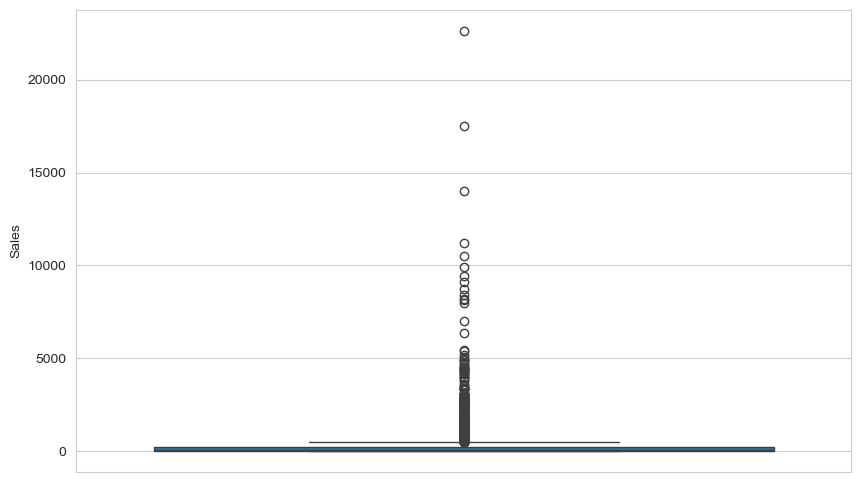

In [39]:
sns.boxplot(data = df['Sales'])
plt.show()

A visualização em caixa não se mostrou muito útil, então podemos normalizar os dados ou verificar a quantidade de outliers antes, para pensar em uma estratégia.

Vamos primeiro analisar a quantidade de outliers:

In [41]:
# Calculating IQR for Sales to identify upper outliers
Q1 = df['Sales'].quantile(0.25)  # First quartile (25%)
Q3 = df['Sales'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range
upper_bound = Q3 + 1.5 * IQR  # Upper limit for outliers

# Counting upper outliers
df[df['Sales'] > upper_bound]['Sales'].count()  # Number of values above upper bound

1145

Com mais de 10% das entradas em `Sales` sendo outliers superiores, decidi investigar seu impacto antes de qualquer tratamento:  

O volume alto sugere que esses valores podem refletir vendas reais e excepcionais, como picos sazonais. Aqui estão as opções consideradas:  
1. Separar os outliers em um dataset à parte pra análise independente, preservando o original.  
2. Aplicar transformação log pra reduzir a escala dos extremos sem excluí-los.  
3. Remover os outliers pra focar nas vendas típicas, simplificando estatísticas.  
4. Limitar os valores ao teto do IQR (capping), equilibrando o dataset.  
5. Usar métricas robustas (ex.: mediana) pra ignorar os extremos sem alterá-los.  

Escolhi a primeira abordagem por priorizar a análise dos dados: ela permite comparar os datasets lado a lado e isolar os outliers pra identificar padrões específicos, como os cenários que levam a vendas de alto valor — um ponto particularmente valioso pra este estudo.

In [43]:
# Creating two datasets
df_outliers = df[df['Sales'] > upper_bound]  # Dataset with upper outliers
df_typical = df[df['Sales'] <= upper_bound]  # Dataset with typical values

Tudo preparado, vamos seguir para a próxima etapa!

## ⚙️ 3. Feature Engineering Temporal e Segmentada

## 4. Análise Temporal Exploratória

## 5. Segmentação e Análise de Subgrupos

## 6. Análise Bivariada e Multivariada

## 7. Pipeline de Automação

## 8. Insights

## 9. Integração com Machine Learning/Deep Learning

## 10. Conclusão e Apresentação Final